# Linear regression

Notebook to look at forecasts made using linear regression.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from linear_regression import get_feature
from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

/var/folders/sy/trsj1fws3q56ylqm17n583900000gn/T/ipykernel_17608/2911405050.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from linear_regression import backtest

In [3]:
ds_begin = datetime(2022, 7, 1)
ds_end = datetime(2024, 12, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

/var/folders/sy/trsj1fws3q56ylqm17n583900000gn/T/ipykernel_17608/3577027969.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \


In [4]:
errors = []

## Predictions using sales

### Predictions when removing the seasonality

In [5]:
error = pd.read_csv('linear_regression/Metro_sales_count_now_uc_sfrcondo_month_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000020  0.004451  0.003728  1.373365  0.611552
1           1   -2  0.000023  0.004816  0.003981  1.771995  0.545353
2           2   -3  0.000030  0.005448  0.004203  1.313165  0.418111
3           3   -4  0.000036  0.006022  0.004639  1.403772  0.289110
4           4   -5  0.000040  0.006350  0.004813  1.554522  0.209564
5           5   -6  0.000045  0.006702  0.005052  1.413338  0.119353


We get the best results for lag 1. Let us plot the predictions.

In [6]:
(y, y_hat) = backtest('Metro_sales_count_now_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, True)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


Text(0.5, 1.0, 'Seasonally adjusted sales')

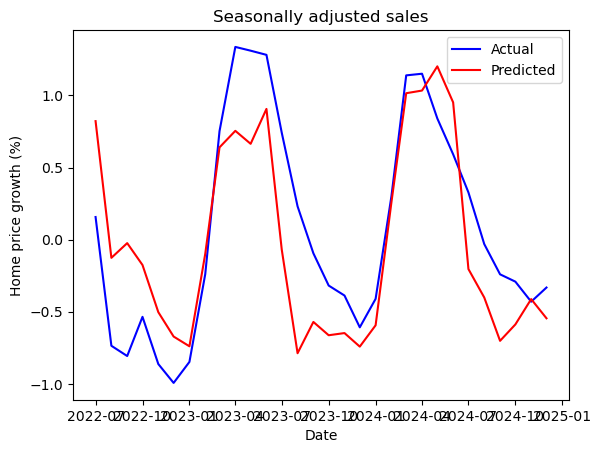

In [7]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted sales')

In [8]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA sales'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [9]:
error = pd.read_csv('linear_regression/Metro_sales_count_now_uc_sfrcondo_month.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000079  0.008867  0.007762  2.311642 -0.541264
1           1   -2  0.000100  0.009989  0.008656  2.678330 -0.956048
2           2   -3  0.000107  0.010341  0.008835  2.917329 -1.096411
3           3   -4  0.000106  0.010306  0.008723  2.988377 -1.082035
4           4   -5  0.000104  0.010212  0.008718  2.853363 -1.044558
5           5   -6  0.000103  0.010138  0.008644  2.339933 -1.015060


We get the best results for lag 1. Let us plot the predictions.

In [10]:
(y, y_hat) = backtest('Metro_sales_count_now_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, False)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

Text(0.5, 1.0, 'Non-seasonally adjusted sales')

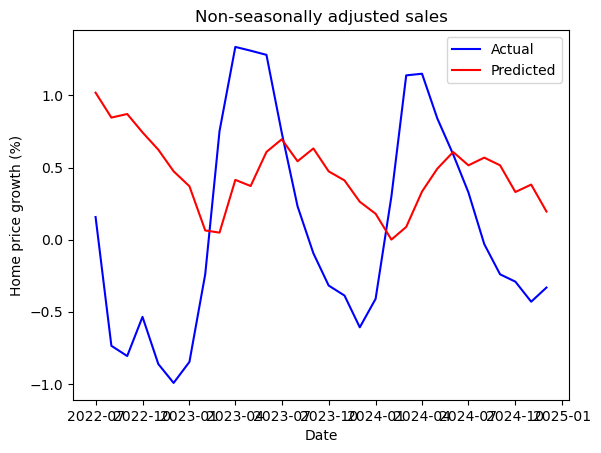

In [11]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non-seasonally adjusted sales')

In [12]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA sales'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using inventory

### Predictions when removing the seasonality

In [13]:
error = pd.read_csv('linear_regression/Metro_invt_fs_uc_sfrcondo_month_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000073  0.008533  0.007048  1.678349 -0.427441
1           1   -2  0.000075  0.008675  0.007074  1.680526 -0.475161
2           2   -3  0.000076  0.008715  0.007094  1.770050 -0.488855
3           3   -4  0.000074  0.008595  0.006984  1.841810 -0.448215
4           4   -5  0.000072  0.008463  0.006838  1.857013 -0.404113
5           5   -6  0.000071  0.008424  0.006671  1.976374 -0.391146


We get the best results for lag 1. Let us plot the predictions.

In [14]:
(y, y_hat) = backtest('Metro_invt_fs_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, True)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

Text(0.5, 1.0, 'Seasonally adjusted inventory')

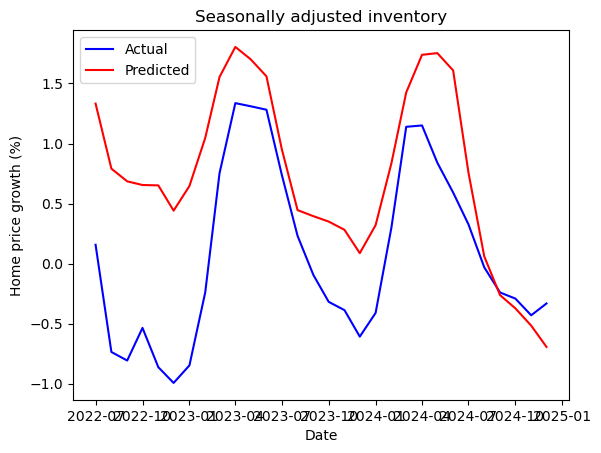

In [15]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted inventory')

In [16]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA inventory'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [17]:
error = pd.read_csv('linear_regression/Metro_invt_fs_uc_sfrcondo_month.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000110  0.010478  0.008146  2.237261 -1.152318
1           1   -2  0.000113  0.010641  0.008118  2.141146 -1.219961
2           2   -3  0.000118  0.010880  0.008346  2.262868 -1.320738
3           3   -4  0.000122  0.011049  0.008480  2.680068 -1.393281
4           4   -5  0.000128  0.011297  0.009234  3.075158 -1.501897
5           5   -6  0.000128  0.011329  0.009395  2.914880 -1.516311


We get the best results for lag 1. Let us plot the predictions.

In [18]:
(y, y_hat) = backtest('Metro_invt_fs_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, False)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


Text(0.5, 1.0, 'Non seasonally adjusted inventory')

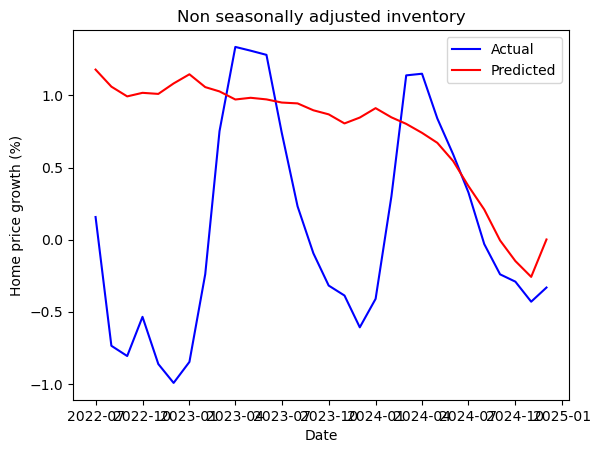

In [19]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted inventory')

In [20]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA inventory'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using new listings

### Predictions when removing the seasonality

In [21]:
error = pd.read_csv('linear_regression/Metro_new_listings_uc_sfrcondo_month_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000033  0.005752  0.004780  1.447994  0.351329
1           1   -2  0.000037  0.006095  0.004982  1.594312  0.271713
2           2   -3  0.000045  0.006717  0.005098  1.171902  0.115434
3           3   -4  0.000047  0.006870  0.005200  1.271890  0.074653
4           4   -5  0.000046  0.006787  0.005216  1.361518  0.097038
5           5   -6  0.000043  0.006554  0.004800  1.016748  0.157808


We get the best results for lag 1. Let us plot the predictions.

In [22]:
(y, y_hat) = backtest('Metro_new_listings_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, True)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

Text(0.5, 1.0, 'Seasonally adjusted new listings')

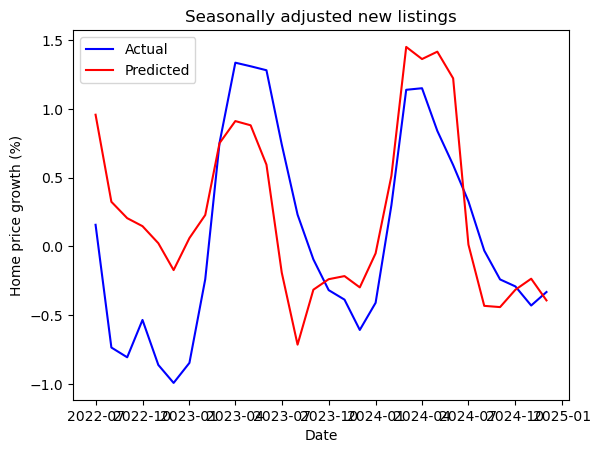

In [23]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted new listings')

In [24]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA new listings'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [25]:
error = pd.read_csv('linear_regression/Metro_new_listings_uc_sfrcondo_month.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000078  0.008812  0.007658  2.550666 -0.522199
1           1   -2  0.000105  0.010247  0.008770  2.852698 -1.058376
2           2   -3  0.000110  0.010495  0.008693  2.771191 -1.159404
3           3   -4  0.000102  0.010114  0.008841  2.827376 -1.005192
4           4   -5  0.000100  0.010000  0.009054  3.145219 -0.960486
5           5   -6  0.000103  0.010165  0.008895  3.200581 -1.025478


We get the best results for lag 1. Let us plot the predictions.

In [26]:
(y, y_hat) = backtest('Metro_new_listings_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, False)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

Text(0.5, 1.0, 'Non seasonally adjusted new listings')

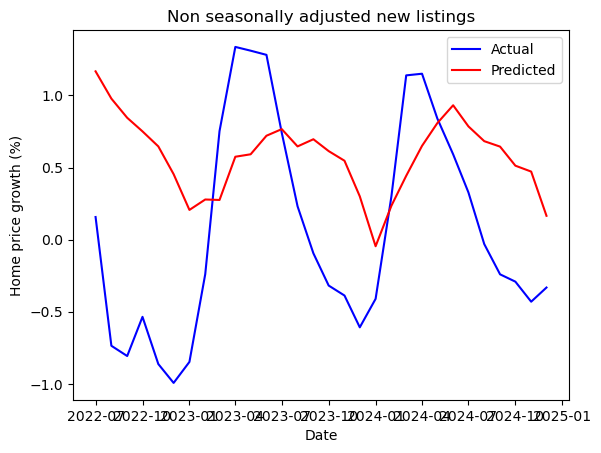

In [27]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted new listings')

In [28]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA new listings'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using mean days to pending

### Predictions when removing the seasonality

In [29]:
error = pd.read_csv('linear_regression/Metro_mean_doz_pending_uc_sfrcondo_month_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000063  0.007954  0.006517  1.748817 -0.240315
1           1   -2  0.000067  0.008167  0.006655  1.684355 -0.307616
2           2   -3  0.000069  0.008292  0.006691  1.601205 -0.347799
3           3   -4  0.000070  0.008357  0.006638  1.492321 -0.369108
4           4   -5  0.000070  0.008392  0.006631  1.473095 -0.380693
5           5   -6  0.000071  0.008400  0.006695  1.586296 -0.383173


We get the best results for lag 1. Let us plot the predictions.

In [30]:
(y, y_hat) = backtest('Metro_mean_doz_pending_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, True)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

Text(0.5, 1.0, 'Seasonally adjusted mean days to pending')

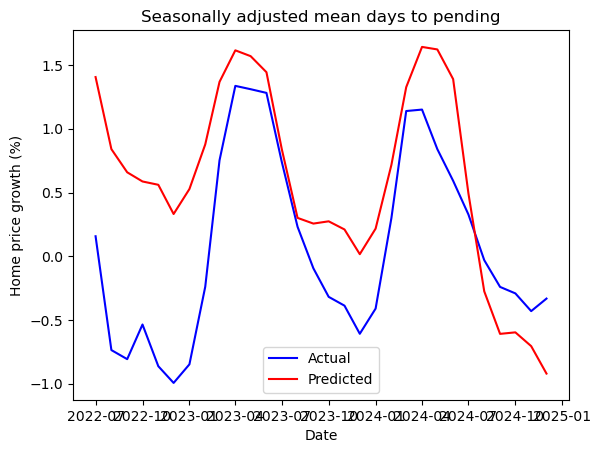

In [31]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted mean days to pending')

In [32]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA mean days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [33]:
error = pd.read_csv('linear_regression/Metro_mean_doz_pending_uc_sfrcondo_month.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000111  0.010523  0.008662  2.746654 -1.171008
1           1   -2  0.000120  0.010935  0.009250  3.061630 -1.344155
2           2   -3  0.000116  0.010750  0.009127  3.044648 -1.265322
3           3   -4  0.000111  0.010529  0.009163  3.067561 -1.173266
4           4   -5  0.000112  0.010564  0.009332  3.288403 -1.187676
5           5   -6  0.000118  0.010869  0.009551  3.573611 -1.316091


We get the best results for lag 1. Let us plot the predictions.

In [34]:
(y, y_hat) = backtest('Metro_mean_doz_pending_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, False)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

Text(0.5, 1.0, 'Non seasonally adjusted mean days to pending')

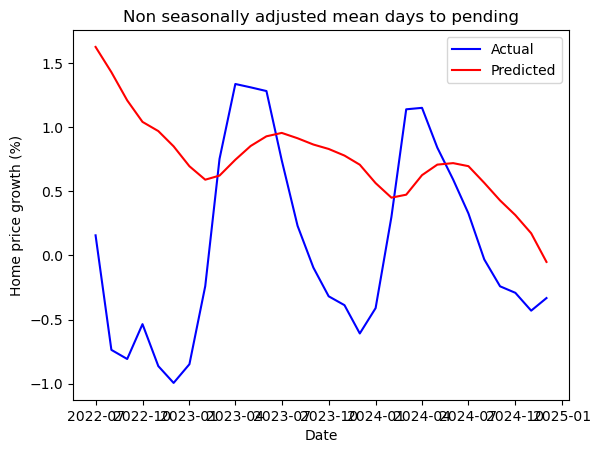

In [35]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted mean days to pending')

In [36]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA mean days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using mean sale-to-list ratio

### Predictions when removing the seasonality

In [37]:
error = pd.read_csv('linear_regression/Metro_mean_sale_to_list_uc_sfrcondo_month_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000041  0.006409  0.004832  1.499586  0.194660
1           1   -2  0.000052  0.007233  0.005596  1.667065 -0.025753
2           2   -3  0.000060  0.007758  0.006093  1.681757 -0.179953
3           3   -4  0.000065  0.008042  0.006428  1.662495 -0.267770
4           4   -5  0.000067  0.008214  0.006622  1.627865 -0.322782
5           5   -6  0.000070  0.008350  0.006751  1.589887 -0.366926


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [38]:
(y, y_hat) = backtest('Metro_mean_sale_to_list_uc_sfrcondo_month', 2, ds_begin, ds_end, 48, True)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

Text(0.5, 1.0, 'Seasonally adjusted mean sale-to-list ratio')

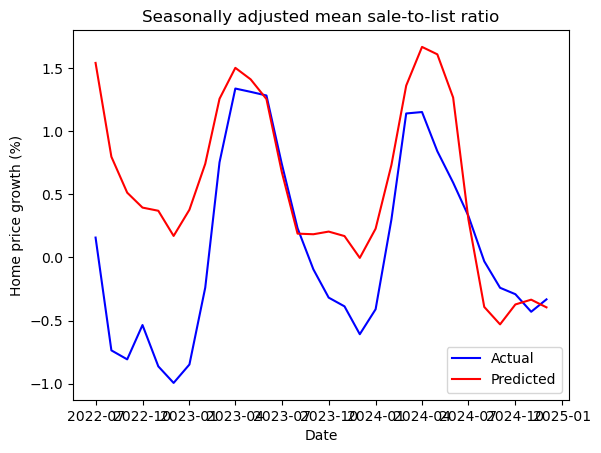

In [39]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted mean sale-to-list ratio')

In [40]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA mean sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [41]:
error = pd.read_csv('linear_regression/Metro_mean_sale_to_list_uc_sfrcondo_month.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000087  0.009338  0.008011  2.552779 -0.709269
1           1   -2  0.000112  0.010587  0.009130  2.972370 -1.197169
2           2   -3  0.000117  0.010816  0.009145  3.057278 -1.293294
3           3   -4  0.000111  0.010553  0.009033  3.141167 -1.183083
4           4   -5  0.000109  0.010438  0.009058  3.317715 -1.136089
5           5   -6  0.000115  0.010737  0.009318  3.518466 -1.259909


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [42]:
(y, y_hat) = backtest('Metro_mean_sale_to_list_uc_sfrcondo_month', 2, ds_begin, ds_end, 48, False)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


Text(0.5, 1.0, 'Non seasonally adjusted mean sale-to-list ratio')

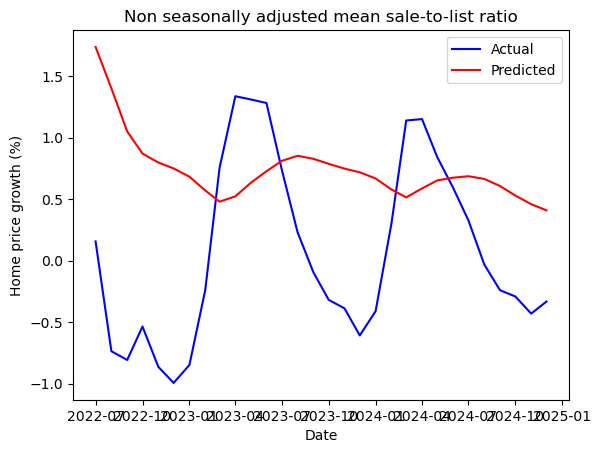

In [43]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted mean sale-to-list ratio')

In [44]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA mean sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using median days to pending

### Predictions when removing the seasonality

In [45]:
error = pd.read_csv('linear_regression/Metro_med_doz_pending_uc_sfrcondo_month_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000048  0.006956  0.005826  1.972445  0.051389
1           1   -2  0.000052  0.007219  0.005917  1.836726 -0.021743
2           2   -3  0.000056  0.007476  0.005948  1.748310 -0.095783
3           3   -4  0.000059  0.007696  0.006074  1.730250 -0.161260
4           4   -5  0.000062  0.007883  0.006148  1.629437 -0.218085
5           5   -6  0.000068  0.008234  0.006400  1.688028 -0.329141


We get the best results for lag 1. Let us plot the predictions.

In [46]:
(y, y_hat) = backtest('Metro_med_doz_pending_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, True)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


Text(0.5, 1.0, 'Seasonally adjusted median days to pending')

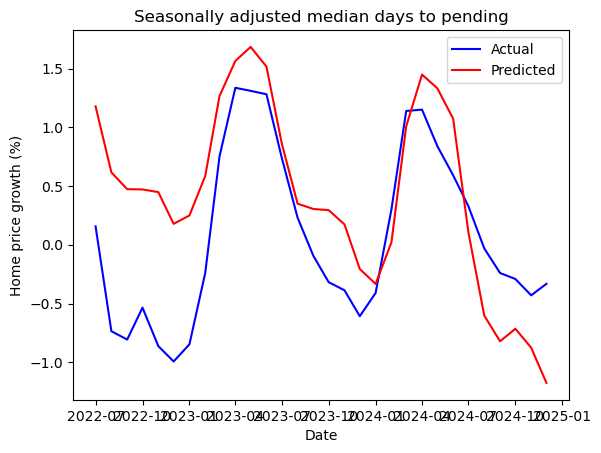

In [47]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted median days to pending')

In [48]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA median days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [49]:
error = pd.read_csv('linear_regression/Metro_med_doz_pending_uc_sfrcondo_month.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000082  0.009082  0.007032  2.124259 -0.616909
1           1   -2  0.000108  0.010415  0.008919  2.809001 -1.126553
2           2   -3  0.000116  0.010771  0.009348  3.006368 -1.274465
3           3   -4  0.000114  0.010680  0.009091  2.954063 -1.236026
4           4   -5  0.000111  0.010552  0.009124  2.926183 -1.182912
5           5   -6  0.000112  0.010570  0.009256  3.123871 -1.190287


We get the best results for lag 1. Let us plot the predictions.

In [50]:
(y, y_hat) = backtest('Metro_med_doz_pending_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, False)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


Text(0.5, 1.0, 'Non seasonally adjusted median days to pending')

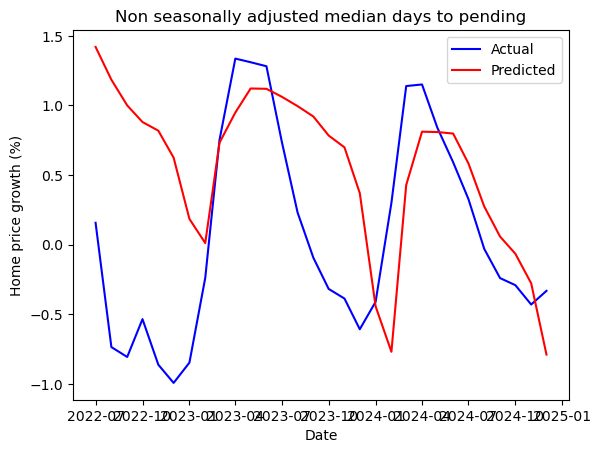

In [51]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted median days to pending')

In [52]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA median days to pending'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using median sale-to-list ratio

### Predictions when removing the seasonality

In [53]:
error = pd.read_csv('linear_regression/Metro_median_sale_to_list_uc_sfrcondo_month_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000045  0.006731  0.005114  1.208680  0.111872
1           1   -2  0.000057  0.007571  0.005761  1.521862 -0.123790
2           2   -3  0.000068  0.008242  0.006371  1.607044 -0.331766
3           3   -4  0.000072  0.008477  0.006518  1.524923 -0.408619
4           4   -5  0.000072  0.008465  0.006537  1.453081 -0.404708
5           5   -6  0.000072  0.008462  0.006704  1.534816 -0.403627


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [54]:
(y, y_hat) = backtest('Metro_median_sale_to_list_uc_sfrcondo_month', 2, ds_begin, ds_end, 48,True)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


Text(0.5, 1.0, 'Seasonally adjusted median sale-to-list ratio')

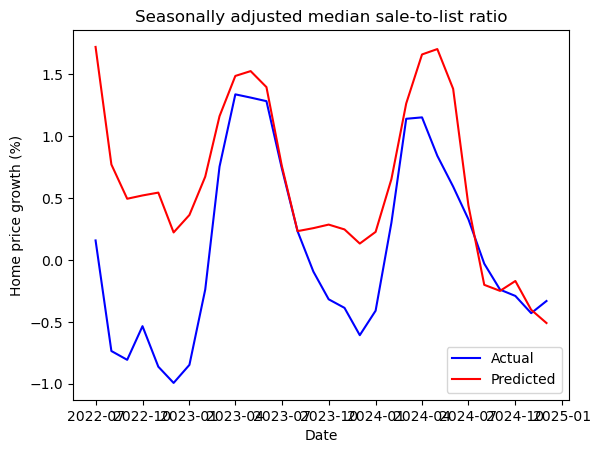

In [55]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted median sale-to-list ratio')

In [56]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA median sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [57]:
error = pd.read_csv('linear_regression/Metro_median_sale_to_list_uc_sfrcondo_month.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000098  0.009917  0.008451  2.959341 -0.928085
1           1   -2  0.000120  0.010941  0.009450  3.127108 -1.346937
2           2   -3  0.000121  0.010986  0.009111  3.023333 -1.366065
3           3   -4  0.000115  0.010735  0.008961  2.871500 -1.259163
4           4   -5  0.000115  0.010716  0.009150  3.031091 -1.251354
5           5   -6  0.000121  0.010991  0.009515  3.396507 -1.368339


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [58]:
(y, y_hat) = backtest('Metro_median_sale_to_list_uc_sfrcondo_month', 2, ds_begin, ds_end, 48, False)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


Text(0.5, 1.0, 'Non seasonally adjusted median sale-to-list ratio')

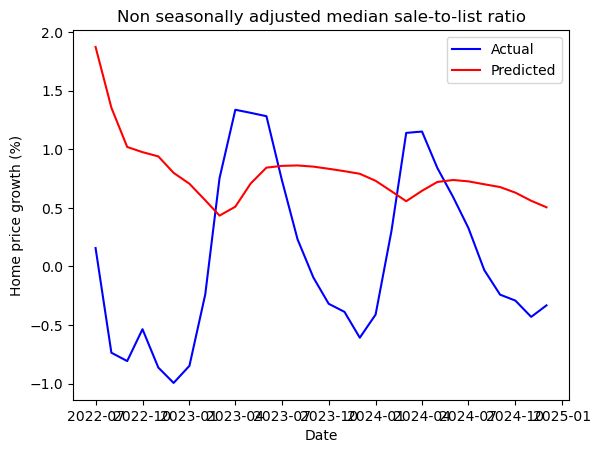

In [59]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted median sale-to-list ratio')

In [60]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA median sale-to-list ratio'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using newly pending listings

### Predictions when removing the seasonality

In [61]:
error = pd.read_csv('linear_regression/Metro_new_pending_uc_sfrcondo_month_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000028  0.005270  0.004041  1.303778  0.455616
1           1   -2  0.000032  0.005646  0.004264  1.553855  0.375056
2           2   -3  0.000039  0.006227  0.004594  1.540306  0.239736
3           3   -4  0.000046  0.006778  0.005160  1.508043  0.099272
4           4   -5  0.000050  0.007081  0.005406  1.676055  0.016981
5           5   -6  0.000053  0.007301  0.005615  1.500207 -0.045089


We get the best results for lag 1. Let us plot the predictions.

In [62]:
(y, y_hat) = backtest('Metro_new_pending_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, True)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

Text(0.5, 1.0, 'Seasonally adjusted newly pending listings')

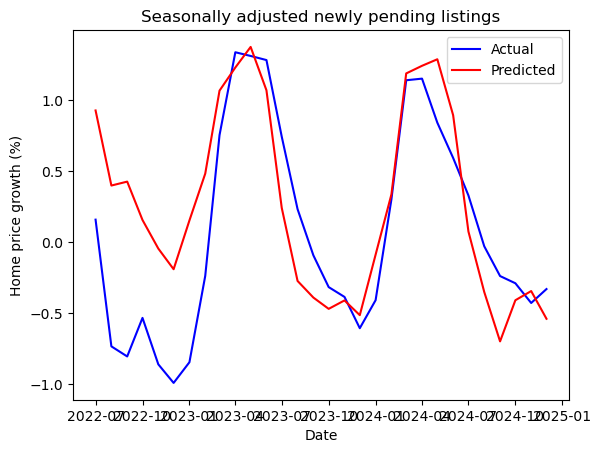

In [63]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted newly pending listings')

In [64]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA newly pending listings'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [65]:
error = pd.read_csv('linear_regression/Metro_new_pending_uc_sfrcondo_month.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000068  0.008253  0.006843  2.197777 -0.335273
1           1   -2  0.000096  0.009820  0.008516  2.675588 -0.890430
2           2   -3  0.000109  0.010455  0.008938  2.920908 -1.143023
3           3   -4  0.000107  0.010348  0.008738  2.955809 -1.099133
4           4   -5  0.000104  0.010199  0.008705  3.034072 -1.039140
5           5   -6  0.000106  0.010305  0.008803  3.061735 -1.081843


We get the best results for lag 1. Let us plot the predictions.

In [66]:
(y, y_hat) = backtest('Metro_new_pending_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, False)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


Text(0.5, 1.0, 'Non seasonally adjusted newly pending listings')

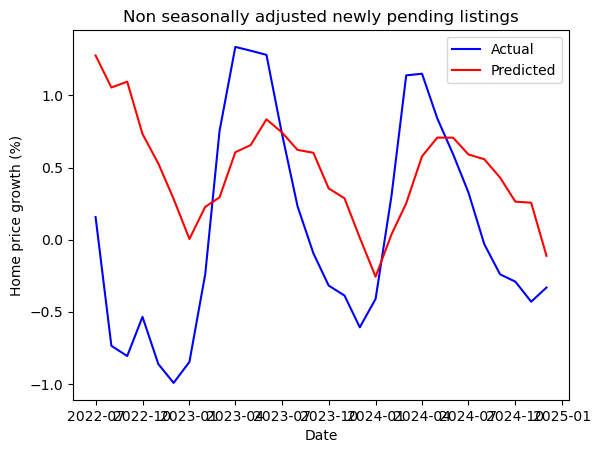

In [67]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted newly pending listings')

In [68]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA newly pending listings'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using percentage of listings with price cut

### Predictions when removing the seasonality

In [69]:
error = pd.read_csv('linear_regression/Metro_perc_listings_price_cut_uc_sfrcondo_month_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000010  0.003099  0.002542  1.100531  0.811781
1           1   -2  0.000012  0.003437  0.002864  1.256047  0.768435
2           2   -3  0.000018  0.004202  0.003116  1.610951  0.653878
3           3   -4  0.000026  0.005134  0.004220  1.888377  0.483339
4           4   -5  0.000037  0.006102  0.005009  1.798671  0.270157
5           5   -6  0.000045  0.006741  0.005371  1.799028  0.109041


We get the best results for lag 1. Let us plot the predictions.

In [70]:
(y, y_hat) = backtest('Metro_perc_listings_price_cut_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, True)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


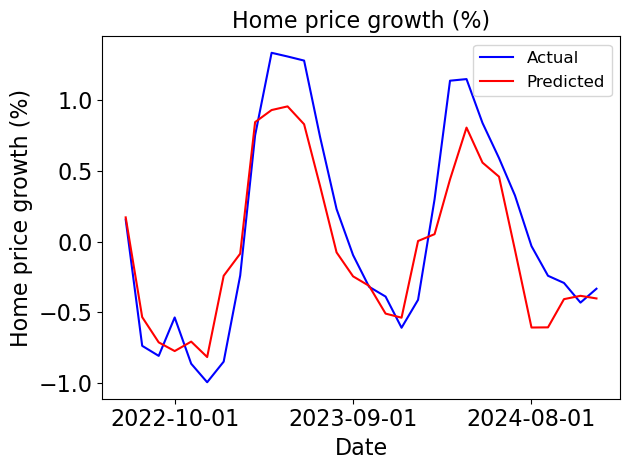

In [71]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2022, 10, 1), datetime(2023, 9, 1), datetime(2024, 8, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/linear_regression_sa.eps', format='eps')
plt.show()

In [72]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA pct listings with price cut'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [73]:
error = pd.read_csv('linear_regression/Metro_perc_listings_price_cut_uc_sfrcondo_month.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000040  0.006292  0.004902  1.322862  0.223912
1           1   -2  0.000028  0.005265  0.004269  1.225030  0.456636
2           2   -3  0.000033  0.005728  0.004015  1.123557  0.356766
3           3   -4  0.000059  0.007709  0.006017  1.579624 -0.165150
4           4   -5  0.000092  0.009572  0.007973  2.362688 -0.796192
5           5   -6  0.000109  0.010431  0.009032  2.812267 -1.133083


We get the best results for lag 1. Let us plot the predictions.

In [74]:
(y, y_hat) = backtest('Metro_perc_listings_price_cut_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, False)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


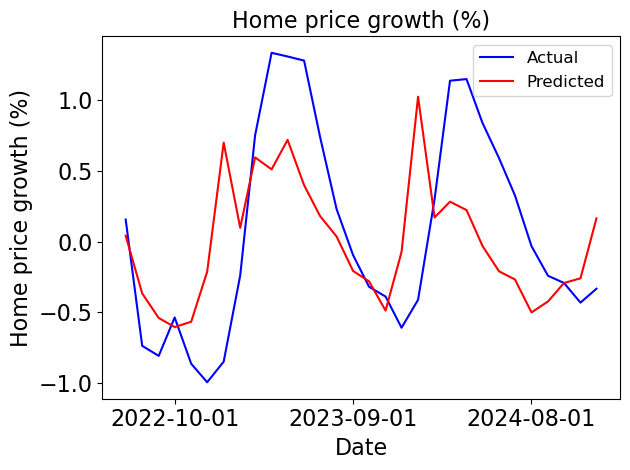

In [75]:
fig, ax = plt.subplots()

plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2022, 10, 1), datetime(2023, 9, 1), datetime(2024, 8, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

plt.tight_layout()
plt.savefig('figures/linear_regression.eps', format='eps')
plt.show()

In [76]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA pct listings with price cut'], 'lag': [1], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using percentage sold above list price

### Predictions when removing the seasonality

In [77]:
error = pd.read_csv('linear_regression/Metro_pct_sold_above_list_uc_sfrcondo_month_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000044  0.006621  0.005028  1.629805  0.140636
1           1   -2  0.000054  0.007332  0.005693  1.754968 -0.053906
2           2   -3  0.000061  0.007801  0.006141  1.747418 -0.193020
3           3   -4  0.000065  0.008090  0.006452  1.720355 -0.283051
4           4   -5  0.000069  0.008285  0.006637  1.676935 -0.345633
5           5   -6  0.000071  0.008422  0.006763  1.622822 -0.390566


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [78]:
(y, y_hat) = backtest('Metro_pct_sold_above_list_uc_sfrcondo_month', 2, ds_begin, ds_end, 48, True)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

Text(0.5, 1.0, 'Seasonally adjusted pct sold above list price')

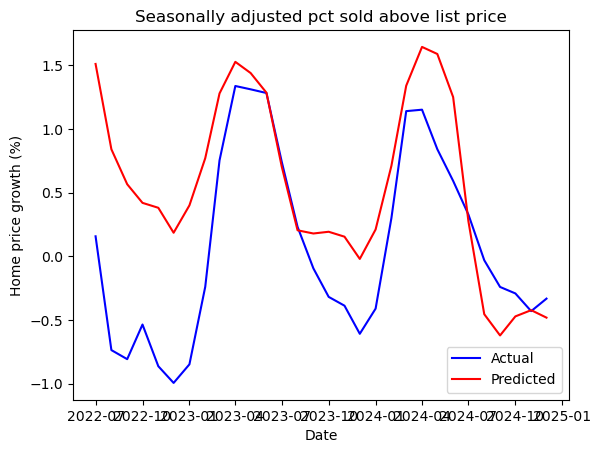

In [79]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted pct sold above list price')

In [80]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA pct sold above list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [81]:
error = pd.read_csv('linear_regression/Metro_pct_sold_above_list_uc_sfrcondo_month.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000090  0.009469  0.007975  2.435787 -0.757847
1           1   -2  0.000112  0.010588  0.009068  2.907862 -1.197708
2           2   -3  0.000119  0.010906  0.009229  3.071525 -1.331626
3           3   -4  0.000117  0.010811  0.009255  3.195063 -1.291452
4           4   -5  0.000116  0.010775  0.009333  3.366160 -1.275966
5           5   -6  0.000121  0.010996  0.009509  3.518037 -1.370327


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [82]:
(y, y_hat) = backtest('Metro_pct_sold_above_list_uc_sfrcondo_month', 2, ds_begin, ds_end, 48, False)

date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


Text(0.5, 1.0, 'Non seasonally adjusted pct sold above list price')

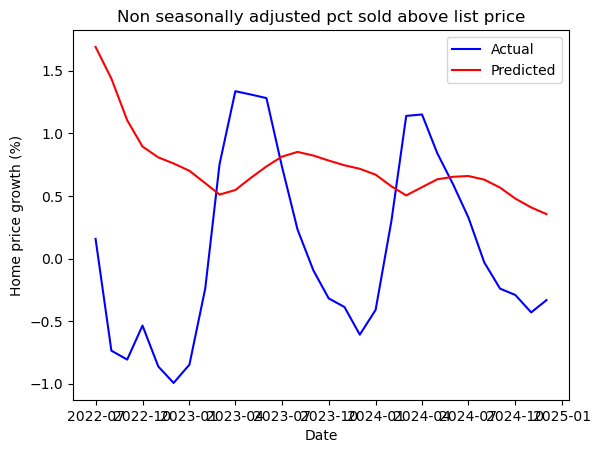

In [83]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted pct sold above list price')

In [84]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA pct sold above list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Predictions using percentage sold below list price

### Predictions when removing the seasonality

In [85]:
error = pd.read_csv('linear_regression/Metro_pct_sold_below_list_uc_sfrcondo_month_sa.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000046  0.006779  0.005172  1.628480  0.099166
1           1   -2  0.000055  0.007413  0.005748  1.723118 -0.077266
2           2   -3  0.000062  0.007854  0.006182  1.723854 -0.209205
3           3   -4  0.000066  0.008146  0.006470  1.697852 -0.300990
4           4   -5  0.000070  0.008347  0.006639  1.655840 -0.366032
5           5   -6  0.000072  0.008477  0.006756  1.604088 -0.408867


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [86]:
(y, y_hat) = backtest('Metro_pct_sold_below_list_uc_sfrcondo_month', 2, ds_begin, ds_end, 48, True)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


Text(0.5, 1.0, 'Seasonally adjusted pct sold below list price')

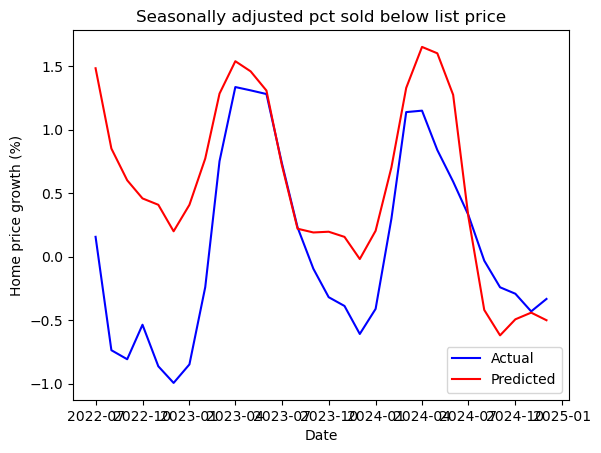

In [87]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Seasonally adjusted pct sold below list price')

In [88]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['SA pct sold below list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

### Predictions when keeping the seasonality

In [89]:
error = pd.read_csv('linear_regression/Metro_pct_sold_below_list_uc_sfrcondo_month.csv')
print(error)

   Unnamed: 0  lag       MSE      RMSE       MAE      MAPE        R2
0           0   -1  0.000094  0.009675  0.008148  2.540872 -0.835232
1           1   -2  0.000114  0.010681  0.009153  2.953924 -1.236711
2           2   -3  0.000119  0.010917  0.009231  3.068340 -1.336227
3           3   -4  0.000117  0.010802  0.009228  3.162164 -1.287473
4           4   -5  0.000116  0.010778  0.009317  3.325451 -1.277485
5           5   -6  0.000121  0.011006  0.009498  3.474499 -1.374901


We cannot use lag 1 as data are not yet available. We get the best results for lag 2. Let us plot the predictions.

In [90]:
(y, y_hat) = backtest('Metro_pct_sold_below_list_uc_sfrcondo_month', 2, ds_begin, ds_end, 48, False)

/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()


date: 2022-07-01 00:00:00
date: 2022-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-09-01 00:00:00
date: 2022-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2022-11-01 00:00:00
date: 2022-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-01-01 00:00:00
date: 2023-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-03-01 00:00:00
date: 2023-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-05-01 00:00:00
date: 2023-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-07-01 00:00:00
date: 2023-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-09-01 00:00:00
date: 2023-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2023-11-01 00:00:00
date: 2023-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-01-01 00:00:00
date: 2024-02-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-03-01 00:00:00
date: 2024-04-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-05-01 00:00:00
date: 2024-06-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-07-01 00:00:00
date: 2024-08-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-09-01 00:00:00
date: 2024-10-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

date: 2024-11-01 00:00:00
date: 2024-12-01 00:00:00


/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  target_growth = target.drop(columns=['date']).pct_change()
/Users/arianeducellier/Documents/Work/Projects/forecasting/linear_regression.py:60: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fil

Text(0.5, 1.0, 'Non seasonally adjusted pct sold below list price')

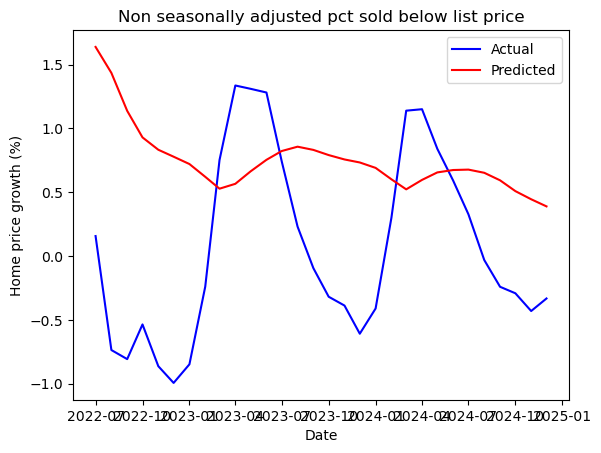

In [91]:
plt.plot(dates, 100 * y, 'b-', label='Actual')
plt.plot(dates, 100 * y_hat, 'r-', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Home price growth (%)')
plt.legend()
plt.title('Non seasonally adjusted pct sold below list price')

In [92]:
MSE = mean_squared_error(y, y_hat)
RMSE = sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)
MAPE = mean_absolute_percentage_error(y, y_hat)
R2 = r2_score(y, y_hat)
error = pd.DataFrame({'feature': ['NSA pct sold below list price'], 'lag': [2], \
    'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'MAPE': [MAPE], 'R2': [R2]})
errors.append(error)

## Conclusion

In [93]:
errors = pd.concat(errors)
errors.to_csv('linear_regression/errors.csv')